In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

# 形态学变换
学习不同的形态学操作，例如腐蚀，膨胀，开运算，闭运算，主要函数为cv2.erode，cv2.dilate，cv2.morphologyEx。形态学操作是根据图像形状进行简单操作，一般对二值化图像进行操作，需要输入两个参数，一个是原始图像，第二个是结构化元素或核（决定操作的性质）。两个基本的形态学操作是腐蚀和膨胀，它们的变体构成了开运算，闭运算，梯度等。

In [2]:
# cv2.erode?
# cv2.dilate?
# cv2.morphologyEx?
# skimage.util.random_noise?

In [3]:
def bgr_to_rgb(bgr):
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return rgb

In [4]:
def rgb_to_bgr(rgb):
    bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
    return bgr

# 腐蚀
该操作会把前景物体的边界腐蚀掉，做法是卷积核沿着图像滑动，如果与卷积核对应的愿图像的所有像素值都是1，那么中心元素就保持原来的像素值，否则就变为0。进行该操作时，根据卷积核的大小靠近前景的所有像素都会被腐蚀掉（变为0），所以前景物体会变小，整幅图像中的白色区域（前景区域）会减小。这对于去除白噪声很有用，也可以用来断开两个连在一起的物体（两个连在一起的物体边界处被腐蚀掉）。
参考[学习 opencv---(10）形态学图像处理（2）：开运算，闭运算，形态学梯度，顶帽，黒帽合辑](http://www.cnblogs.com/wyuzl/p/6266498.html)

In [5]:
img_src_bgr = cv2.imread('../../data/lena.jpg')

In [6]:
type(img_src_bgr)

numpy.ndarray

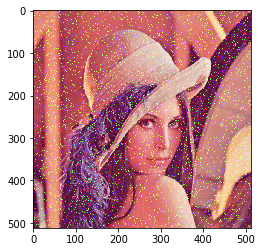

In [7]:
img_src_rgb = bgr_to_rgb(img_src_bgr)
img_src_noise_rgb = skimage.util.random_noise(img_src_rgb, mode='salt')
img_src_noise_rgb = (img_src_noise_rgb * 255).round().astype(np.uint8)
# print('img_src_noise_rgb.shape:', img_src_noise_rgb.shape)
# print('img_src_noise_rgb.dtype:', img_src_noise_rgb.dtype)
plt.imshow(img_src_noise_rgb)
img_src_noise_bgr = rgb_to_bgr(img_src_noise_rgb)

In [8]:
kernel = np.ones((5, 5), np.uint8)
img_dst_erode_bgr = cv2.erode(img_src_noise_bgr, kernel, iterations=-1)

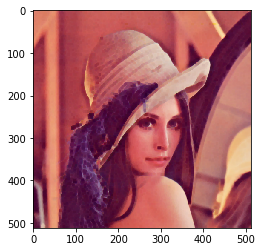

In [9]:
plt.imshow(bgr_to_rgb(img_dst_erode_bgr)) # 边界被腐蚀了

# 膨胀
与腐蚀相反，与卷积核对应的原图像的像素值中只要有一个是1，中心元素的像素就是1。所以这个操作会增加图像中的白色区域，一般在去噪时先用腐蚀再用膨胀。因为腐蚀在去掉白噪声的同时，也会使前景对象变小，所以在对他进行膨胀，这时噪声已经被去除了，不会再回来了，但是前景还会增加。膨胀也可以用来链接两个分开的物体。

In [10]:
kernel = np.ones((5, 5), np.uint8)
img_dst_dilate_bgr = cv2.dilate(img_dst_erode_bgr, kernel, iterations=1)

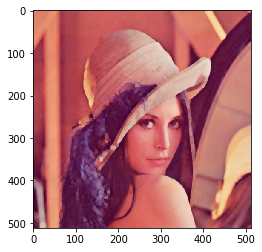

In [11]:
plt.imshow(bgr_to_rgb(img_dst_dilate_bgr)) # 边界被膨胀了

# 开运算
先进行腐蚀在进行膨胀叫做开运算，它被用来去除噪声，所用函数是cv2.morphologyEx()

In [12]:
kernel = np.ones((5, 5), np.uint8)
img_dst_open_bgr = cv2.morphologyEx(img_src_noise_bgr, cv2.MORPH_OPEN, kernel)

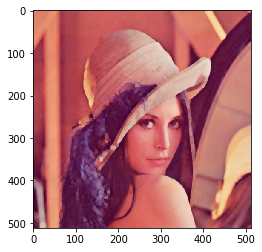

In [13]:
plt.imshow(bgr_to_rgb(img_dst_open_bgr))

# 闭运算
先膨胀在腐蚀，该操作经常被用来填充前景物体中的小洞，或者前景物体上的小黑点。

In [14]:
kernel = np.ones((5, 5), np.uint8)
img_dst_close_bgr = cv2.morphologyEx(img_src_bgr, cv2.MORPH_CLOSE, kernel)

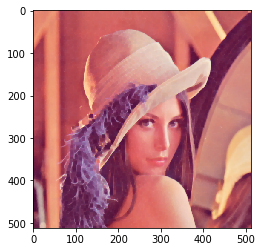

In [15]:
plt.imshow(bgr_to_rgb(img_dst_close_bgr))

# 形态学梯度
形态学梯度是一副图像膨胀与腐蚀的差别。结果看上去就像前景物体的轮廓。

In [16]:
kernel = np.ones((5, 5), np.uint8)
img_dst_gradient_bgr = cv2.morphologyEx(img_src_bgr, cv2.MORPH_GRADIENT, kernel)

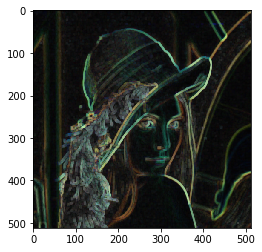

In [17]:
plt.imshow(bgr_to_rgb(img_dst_gradient_bgr))

# 礼帽
原始图像与进行开运算之后得到的图像的差。

In [18]:
kernel = np.ones((5, 5), np.uint8)
img_dst_tophat_bgr = cv2.morphologyEx(img_src_bgr, cv2.MORPH_TOPHAT, kernel)

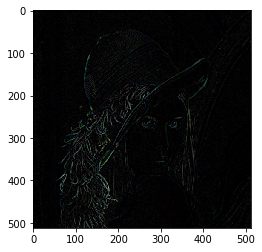

In [19]:
plt.imshow(bgr_to_rgb(img_dst_tophat_bgr))

# 黑帽
进行闭运算之后得到的图像与原始图像的差

In [20]:
kernel = np.ones((5, 5), np.uint8)
img_dst_blackhat_bgr = cv2.morphologyEx(img_src_bgr, cv2.MORPH_BLACKHAT, kernel)

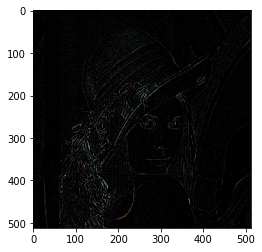

In [21]:
plt.imshow(bgr_to_rgb(img_dst_blackhat_bgr))